# K-Means算法

> 使用[corpus_train.txt](./corpus_train.txt)中文本数据集对单词进行聚类


In [46]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
import numpy as np

## 数据预处理
输入数据向量化

In [47]:
def tfidf_vector(corpus_path):
    """向量化函数"""
    corpus_train = []  # 用于提取特征
    target_train = []
    for line in open(corpus_path):
        line = line.strip().split('\t')
        if len(line) == 2:
            words = line[1]
            category = line[0]
            target_train.append(category)
            corpus_train.append(words)
    print ("build train-corpus done!!")
    count_v1 = CountVectorizer(max_df=0.4, min_df=0.01)  # 忽略高于或者低于阈值的词
    counts_train = count_v1.fit_transform(corpus_train)  # 索引-词频
    print(count_v1.get_feature_names())
    word_dict = {}
    for index, word in enumerate(count_v1.get_feature_names()):
        word_dict[index] = word

    print('Shape of train is', repr(counts_train.shape))
    # 转化为术语的频率
    tfidftransformer = TfidfTransformer()
    tfidf_train = tfidftransformer.fit_transform(counts_train)  # 标准化的tf-idf
    return tfidf_train, word_dict

## K-Means算法
聚类代码

In [48]:
def cluster_kmeans(tfidf_train, word_dict, cluster_doc, cluster_keywords, num_clusters):
    f_doc = open(cluster_doc, 'w+')
    km = KMeans(n_clusters=num_clusters)
    km.fit(tfidf_train)
    clusters = km.labels_.tolist()
    cluster_dict = {}
    order_centroids = km.cluster_centers_.argsort()[:,::-1]
    doc = 1
    for cluster in clusters:
        f_doc.write(str(str(doc)) + ',' + str(cluster) + '\n')
        doc = doc + 1
        if cluster not in cluster_dict:
            cluster_dict[cluster] = 1
        else:
            cluster_dict[cluster] = cluster_dict[cluster] + 1
    f_doc.close()
    cluster = 1

    f_clusterwords = open(cluster_keywords, 'w+')
    for ind in order_centroids: # 每个类别选50歌词
        words = []
        for index in ind[:50]:
            words.append(word_dict[index])
        print(cluster, ','.join(words))
        f_clusterwords.write(str(cluster) + '\t' + ','.join(words) + '\n')
        cluster = cluster + 1
        print('=====' * 50)
    f_clusterwords.close()


选择K的值

In [49]:
def best_kmeans(tfidf_matrix, word_dict):
    K = range(1, 10)
    meandistortions = []
    for k in K:
        print (k), ('====='*5)
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(tfidf_matrix)
        meandistortions.append(sum(np.min(cdist(tfidf_matrix.toarray(), kmeans.cluster_centers_, 'euclidean'), axis=1)) / tfidf_matrix.shape[0])
    plt.plot(K, meandistortions, 'bx-')
    plt.grid(True)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average within-cluster sum of squares')
    plt.title('Elbow for Kmeans clustering')
    plt.show()




## 开始训练

build train-corpus done!!
['abaaoud', 'abdeslam', 'act', 'action', 'added', 'afghanistan', 'africa', 'air', 'airstrikes', 'al', 'america', 'american', 'anti', 'area', 'armed', 'army', 'arrested', 'asked', 'assad', 'atrocity', 'attack', 'attacker', 'attacks', 'authority', 'band', 'bank', 'bataclan', 'bbc', 'belgian', 'belgium', 'believed', 'blair', 'blast', 'blood', 'body', 'bomb', 'bomber', 'bombing', 'border', 'britain', 'british', 'brother', 'brussels', 'bus', 'bush', 'business', 'call', 'called', 'cameron', 'campaign', 'capital', 'car', 'cell', 'cent', 'centre', 'change', 'chief', 'child', 'city', 'claim', 'clarke', 'close', 'common', 'community', 'company', 'concern', 'concert', 'cop', 'corbyn', 'country', 'crime', 'cross', 'cup', 'cut', 'david', 'day', 'de', 'dead', 'death', 'defence', 'didn', 'died', 'doe', 'don', 'drone', 'due', 'east', 'economic', 'emergency', 'emwazi', 'enemy', 'england', 'eu', 'europe', 'european', 'event', 'evil', 'expert', 'explosion', 'explosive', 'extremi

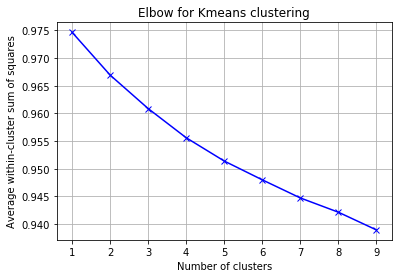

1 paris,belgian,france,french,police,europe,attack,european,border,eu,syria,brussels,abaaoud,belgium,terrorist,intelligence,country,security,refugee,passport,isi,minister,abdeslam,attacks,brother,suicide,migrant,people,state,year,yesterday,arrested,national,terror,car,terrorism,man,raid,hollande,authority,travel,syrian,told,attacker,friday,night,information,government,men,meeting
2 london,day,week,people,attack,security,terrorist,year,police,world,market,time,yesterday,city,terrorists,thursday,terror,company,cut,business,bomb,g8,force,home,leader,olympic,service,high,government,blair,terrorism,officer,price,economic,today,event,financial,olympics,war,group,country,stock,share,message,number,armed,street,bank,public,summit
3 game,england,match,france,football,player,team,french,paris,wembley,stadium,fan,night,friday,friendly,germany,play,fa,world,cup,show,security,time,tuesday,united,people,weekend,day,attack,terrorist,solidarity,national,sport,win,week,event,police,good,le,happened,de,

In [50]:
corpus_train = "corpus_train.txt"
cluster_docs = "cluster_result_document.txt"
cluster_keywords = "cluster_result_keyword.txt"
num_clusters = 7
tfidf_train,word_dict = tfidf_vector(corpus_train)
best_kmeans(tfidf_train,word_dict)
cluster_kmeans(tfidf_train,word_dict,cluster_docs,cluster_keywords,num_clusters)
